<a href="https://colab.research.google.com/github/asutoshsabat91/akk/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading Data

In [ ]:
df= pd.read_csv('/content/credit_score.csv')
df=df.drop(columns=["ID", "Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"])
df.head()

<ipython-input-4-3856721085>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/credit_score.csv')


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


Data Cleaning

In [ ]:
df["Age"] = df["Age"].astype(str).str.replace("_","")
df["Age"] = df["Age"].astype(int)
df["Occupation"] = df["Occupation"].replace("_______",np.nan)
df["Annual_Income"] = df["Annual_Income"].astype(str).str.replace("_","")
df["Annual_Income"] = df["Annual_Income"].astype(float)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(str).str.replace("_","")
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(str).str.replace("_","")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
df["Credit_Score"] = df["Credit_Score"].replace(["Poor","Standard","Good"],[0,1,2])
df["Monthly_Balance"] = df["Monthly_Balance"].astype(str).str.replace("_","")
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8",np.nan)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(str).str.replace("_","")
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM","No")
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("Yes","No")
df["Outstanding_Debt"] = df["Outstanding_Debt"].replace("_",np.nan)
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Credit_Mix"] = df["Credit_Mix"].replace("_",np.nan)
df["Credit_Mix"] = df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_",np.nan).replace('',np.nan)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [ ]:
df.isnull().sum()
df=df.fillna(method="ffill")
df=df.fillna(method="bfill")
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


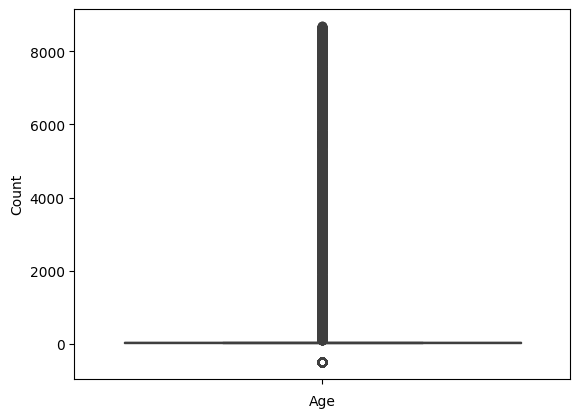

In [ ]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

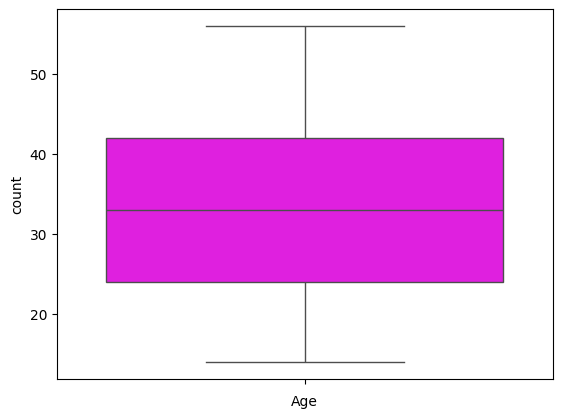

In [ ]:
col_names=["Age"]
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
IQR= Q3-Q1
data= df[(df.Age >= Q1 - 1.5*IQR)& (df.Age <= Q3 + 1.5*IQR)]
sns.boxplot(data["Age"], color='magenta')
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Occupation"]= le.fit_transform(df["Occupation"])
df["Month"]=le.fit_transform(df["Month"])
df["Payment_Behaviour"]=le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

Feature Selection

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
   if((df[col].dtype != 'object') & (col !='Credit_Score')) :
    col_list.append(col)

X=df[col_list]
vif_data= pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]  = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.277722
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.279465
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16       Total_EMI_per_month  0.972258
17   Amount_invested_monthly  0.911321
18         Payment_Behaviour  0.310525
19           Monthly_Balance  1.000195


Logistic Regression

In [ ]:
# Handle categorical columns before splitting and scaling
df['Credit_Mix'] = df['Credit_Mix'].replace('np.nan', np.nan) # Replace the string 'np.nan' with actual np.nan
df['Credit_Mix'] = df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0]) # Fill missing values
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix']) # Label encode

# df = pd.get_dummies(df, columns=['Payment_of_Min_Amount'], drop_first=True) # One-hot encode - This line caused the error

X=df.drop(columns=["Credit_Score"])
y=df["Credit_Score"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

0.60965
[[2393 3081  400]
 [1327 7991 1281]
 [  48 1670 1809]]
              precision    recall  f1-score   support

           0       0.64      0.41      0.50      5874
           1       0.63      0.75      0.68     10599
           2       0.52      0.51      0.52      3527

    accuracy                           0.61     20000
   macro avg       0.59      0.56      0.57     20000
weighted avg       0.61      0.61      0.60     20000



,Actual,Predicted
75721,2,2
80184,0,0
19864,2,2
76699,0,1
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

0.6829


,Actual,Predicted
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Hyper Parameter Tuning on Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters ={'max_features':['log2','sqrt','auto'],
             'criterion':['entropy','gini'],
             'max_depth':[2,3,5,10,50],
             'min_samples_split':[2,3,50,100],
             'min_samples_leaf':[1,5,8,10]
          }
grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(x_train, y_train)
dt= grid_obj.best_estimator_
y_pred = dt.predict(x_test)
acc_dt = round(accuracy_score(y_test, y_pred)*100,2)
print(acc_dt)

69.64


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':y_pred})

0.78925


,Actual_Value,Predicted_Value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Hyperparameter Tuning on Random Forest

In [ ]:
# prompt: use hyperparameter tuning in Random Forest

# Hyperparameter tuning for RandomForestClassifier
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_features': ['log2', 'sqrt'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=1, verbose=2)

# Fit the grid search to the training data
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

print("Best hyperparameters for Random Forest:", best_params_rf)

# Make predictions with the best Random Forest model
y_pred_rf = best_rf_model.predict(x_test)

# Evaluate the best Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nAccuracy of the best Random Forest model:", accuracy_rf)
print("\nConfusion Matrix of the best Random Forest model:\n", confusion_matrix_rf)
print("\nClassification Report of the best Random Forest model:\n", classification_report_rf)

# Display actual vs predicted values
print("\nActual vs Predicted values (Random Forest):")
print(pd.DataFrame({'Actual_Value': y_test, 'Predicted_Value': y_pred_rf}))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estim

KeyboardInterrupt: 